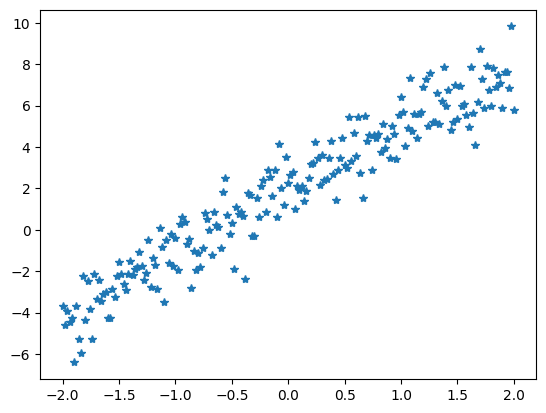

In [46]:
# Aprendendo a tratar dados
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

plt.plot(x, y, '*')
plt.show()

In [45]:
import tensorflow as tf

def parse_object_to_tensor(obj):
    tensor = []
    for key in obj:
        if type(obj[key]) is dict:
            for dpth_key in obj[key]:
                tensor.append(tf.data.TextLineDataset(obj[key][dpth_key]))
        else:
            tensor.append(tf.data.TextLineDataset(obj[key]))
    return tensor

obj = {"a": "12", "b": {"nm": "13"}, "c": "ajsodjsa"}

a = tf.data.experimental.SqlDataset('bigQuery', 'an', "SELECT * FROM ALL")

print(a)

<_TensorDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.string, name=None), TensorShape([3]))>


In [1]:
# Obtendo dados do BiqQuery
from google.cloud import bigquery
import json
import pandas as pd

client = bigquery.Client()

query_job = client.query(
    """
    SELECT * FROM `growyxprod.firebase_projects.post_schema_projectPositions_latest` LIMIT 150
    """
)

result = query_job.result()

tensor = []

for row in result:
    tensor.append(json.loads(row.positions_member))

# print(tensor)

df = pd.json_normalize(tensor)

df['jobTitle'] = df['jobTitle'].fillna(0)
df['skills'] = df['skills'].fillna('[]')
df['skills'] = ','.join(df['skills'][0])
df['softwares'] = ','.join(df['softwares'][0])
df['codeLanguage'] = ','.join(df['codeLanguage'][0])
# df.drop(df[(df['jobTitle'] == 0)].index, inplace=True)
# print(df.head())
candidate = df.pop('database')

df.head()


,codeLanguage,softwares,jobTitle,skills
0,React,,0,"[,]"
1,React,,Project manager,"[,]"
2,React,,UX Designer,"[,]"
3,React,,Developer front-end,"[,]"
4,React,,Developer back-end,"[,]"


In [2]:

selecteds_query_job = client.query(
    """
    SELECT quizPersonality_profile_personal, quizSoftSkills_profile_trustiness,
     quizSoftSkills_profile_innovation, quizSoftSkills_profile_purpose,
     quizSoftSkills_profile_mentalSecurity, quizSoftSkills_profile_totalPoints,
     quizSoftSkills_profile_teamWork, quizSoftSkills_profile_level,
       wages_currency, wages_hourGrossValue,
       experience_jobTitle, experience_level, experience_workAvailability,
        quizCulture_profile_adhocracia, quizCulture_profile_cla,
         quizCulture_profile_hierarchy, quizCulture_profile_market,
          quizPersonality_profile_calm, quizPersonality_profile_selfEsteem, 
           quizPersonality_profile_trustworthy, quizPersonality_profile_conformity,
            quizPersonality_profile_discerening, quizPersonality_profile_careful,
             quizPersonality_profile_dominance, quizPersonality_profile_enthusiastic,
              quizPersonality_profile_spontaneous, quizPersonality_profile_stability,
               quizPersonality_profile_influence, quizPersonality_profile_influencer,
                quizPersonality_profile_selfish, quizPersonality_profile_objective,
                 quizPersonality_profile_organized, quizPersonality_profile_optimist,
                  quizPersonality_profile_listener, quizPersonality_profile_patient,
                   quizPersonality_profile_persuasive, quizPersonality_profile_planner,
                    quizPersonality_profile_precision, quizPersonality_profile_radical,
                     quizPersonality_profile_visionary,  FROM `growyxprod.firestore_export.posts_schema_bqUsers_latest` LIMIT 150
    """
)

selectedes = selecteds_query_job.to_arrow().to_pandas()

dt = selectedes
# dt.drop(['document_name', 'document_id', 'timestamp', 'operation', 'login_providerId'], axis='columns', inplace=True)
ks = pd.DataFrame(dt)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_currency,wages_hourGrossValue,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,18.000000000,10.000000000,14.000000000,14.000000000,75.000000000,19.000000000,None,BRL,100,...,100.000000000,100.000000000,100.000000000,60.000000000,80.000000000,100.000000000,100.000000000,60.000000000,100.000000000,100.000000000
1,None,18.000000000,13.000000000,20.000000000,12.000000000,76.000000000,13.000000000,None,BRL,150,...,100.000000000,100.000000000,100.000000000,100.000000000,100.000000000,100.000000000,100.000000000,80.000000000,100.000000000,100.000000000
2,None,None,None,None,None,None,None,None,BRL,212,...,100.000000000,80.000000000,80.000000000,60.000000000,60.000000000,80.000000000,80.000000000,40.000000000,80.000000000,80.000000000
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [3]:
strData = ks[['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability']].copy()
ks = ks.drop(['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability'], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,18.000000000,10.000000000,14.000000000,14.000000000,75.000000000,19.000000000,None,100,0E-9,...,100.000000000,100.000000000,100.000000000,60.000000000,80.000000000,100.000000000,100.000000000,60.000000000,100.000000000,100.000000000
1,None,18.000000000,13.000000000,20.000000000,12.000000000,76.000000000,13.000000000,None,150,21.000000000,...,100.000000000,100.000000000,100.000000000,100.000000000,100.000000000,100.000000000,100.000000000,80.000000000,100.000000000,100.000000000
2,None,None,None,None,None,None,None,None,212,None,...,100.000000000,80.000000000,80.000000000,60.000000000,60.000000000,80.000000000,80.000000000,40.000000000,80.000000000,80.000000000
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
# strData.replace("", "ND", inplace=True)
strData.fillna("ND", inplace=True)
# print(strData['experience_jobTitle'][2])
strData.head()

,wages_currency,experience_jobTitle,experience_level,experience_workAvailability
0,BRL,tech lead,Sênior,Part-time
1,BRL,,Sênior,Full-time
2,BRL,software engineer,Expert,Full-time
3,ND,ND,ND,ND
4,ND,,ND,ND


In [5]:
exp = pd.get_dummies(strData, dtype=int)
exp.head()

,wages_currency_BRL,wages_currency_ND,experience_jobTitle_,experience_jobTitle_ND,experience_jobTitle_business intelligence analyst,experience_jobTitle_community manager,experience_jobTitle_cto,experience_jobTitle_customer experience specialist,experience_jobTitle_data scientist,experience_jobTitle_developer back-end,...,experience_level_pleno,experience_level_selecione...,experience_level_sênior,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
ks.fillna(0, inplace=True)
ks = ks.apply(pd.to_numeric, errors='coerce')
ks = pd.concat([ks, exp], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,experience_level_pleno,experience_level_selecione...,experience_level_sênior,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,0,18.0,10.0,14.0,14.0,75.0,19.0,0,100.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0,18.0,13.0,20.0,12.0,76.0,13.0,0,150.0,21.0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0,212.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
categ = pd.get_dummies(df, dtype=int)
categ.head()

,codeLanguage_React,softwares_,jobTitle_0,jobTitle_Agile coach,jobTitle_Data engineer,jobTitle_DevOps engineer,jobTitle_Developer back-end,jobTitle_Developer front-end,jobTitle_Developer full-stack,jobTitle_Developer mobile,jobTitle_Product owner,jobTitle_Project manager,jobTitle_Quality Assurance Engineer,jobTitle_Software engineer,jobTitle_UX / UI Designer,jobTitle_UX Designer,"skills_[,]"
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [9]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((ks, categ))

for feat in dataset.take(20):
    print('Feature: {}'.format(feat))


Feature: (<tf.Tensor: shape=(82,), dtype=float64, numpy=
array([  0.,  18.,  10.,  14.,  14.,  75.,  19.,   0., 100.,   0.,   5.,
         0.,   1., 100., 100.,  80.,  84.,   0.,  60.,  92.,  20., 100.,
        84.,  84., 100., 100., 100., 100., 100.,  60.,  80., 100., 100.,
        60., 100., 100.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.])>, <tf.Tensor: shape=(17,), dtype=int32, numpy=array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])>)
Feature: (<tf.Tensor: shape=(82,), dtype=float64, numpy=
array([  0.,  18.,  13.,  20.,  12.,  76.,  13.,   0., 150.,  21.,   0.,
         0.,  21.,  80., 100., 100.,  88.,   0.,  80.,  96., 100.,  80.,
        96.,  92.,  80., 100., 100., 100., 100., 100., 100., 100., 100.,
        80.